In [ ]:
#cat_SegmentationClassのラベルを全て変更するプログラム
import shutil
import glob 
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from IPython.display import display_jpeg, display_png
files = glob.glob('/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass/*.png')
file = []
for i in files:
  pic = i.split('/')
  pic = pic[9]
  file.append(pic)
for j in file:
  pil_img = Image.open("/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass/"+str(j))  # PIL で読み込む。
  color = pil_img.getpalette()  #カラーパレット情報を保存する。
  img = np.asarray(pil_img)  # numpy 配列に変換する。この時点でカラーパレット情報は失われる。　　
  img_1 = np.where(img == 8,1,img)  #画像の8を1に変換
  img_1 = np.uint8(img_1) #floatからuint8に変更
  pil_img_color =Image.fromarray(img_1) #配列からPIL画像に変換
  pil_img_color = pil_img_color.convert('P') #PIL画像をカラーパレットモードに変更
  pil_img_color.putpalette(color)
  pil_img_color.save("/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass_convert/"+str(j))






In [ ]:
import glob
files = glob.glob('/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass_convert/*.png')

In [ ]:
files

['/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass_convert/2011_003216.png',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass_convert/2008_000464.png',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass_convert/2007_009794.png',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass_convert/2008_000345.png',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass_convert/2008_000182.png',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass_convert/2008_000401.png',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass_convert/2007_009923.png',
 '/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass_convert/2007_009346.png',
 '/content/drive/MyDrive/3_semantic_segm

In [ ]:
a = []
for file in files:
  file = file.split('/')
  a.append(file[9])
  
print(a)
print(len(a))

['2011_003216.png', '2008_000464.png', '2007_009794.png', '2008_000345.png', '2008_000182.png', '2008_000401.png', '2007_009923.png', '2007_009346.png', '2007_009724.png', '2007_008815.png', '2007_009464.png', '2007_009221.png', '2007_008575.png', '2007_008403.png', '2007_006641.png', '2007_005460.png', '2007_004998.png', '2007_007524.png', '2007_005688.png', '2007_007098.png', '2007_006260.png', '2007_004866.png', '2007_004856.png', '2007_003991.png', '2007_000876.png', '2007_001774.png', '2007_002445.png', '2007_003525.png', '2007_002470.png', '2007_002760.png', '2007_000549.png', '2007_000528.png', '2008_002215.png', '2008_002152.png', '2008_002182.png', '2008_002177.png', '2008_001741.png', '2008_001610.png', '2008_001885.png', '2008_001876.png', '2008_001640.png', '2008_001592.png', '2008_001513.png', '2008_001433.png', '2008_000853.png', '2008_000860.png', '2008_002681.png', '2008_002749.png', '2008_003499.png', '2008_002623.png', '2008_006480.png', '2008_006325.png', '2008_00571

In [ ]:
print(len(files))

186


In [ ]:
print(len(files))

186


ここから1枚のラベルを変更する手順スタート

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from IPython.display import display_jpeg, display_png

pil_img = Image.open("/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass_convert/2011_003216.png")  # PIL で読み込む。
img = np.asarray(pil_img)  # numpy 配列に変換する。
img_ = pil_img.convert("P")

print(img.shape)  # (500, 375)
print(img)
print(pil_img)
print(img_)
# [[  0   0   0 ...,   0   0   0]
#  [  0   0   0 ...,   0   0   0]
#  [  0   0   0 ...,   0   0   0]
#  ..., 
#  [255  11  11 ...,   0   0   0]
#  [255  11  11 ...,   0   0   0]
#  [255  11  11 ...,   0   0   0]]

(300, 400)
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
<PIL.PngImagePlugin.PngImageFile image mode=P size=400x300 at 0x7F8C4E268C10>
<PIL.Image.Image image mode=P size=400x300 at 0x7F8C3EE9A390>


In [ ]:
color = pil_img.getpalette()

In [ ]:
img = np.asarray(pil_img)

In [ ]:
img

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
img = np.uint8(img)

In [ ]:
img

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
img_1 = np.where(img == 1,8,img)
img_1 = np.uint8(img_1)
img_1

array([[0, 0, 0, ..., 8, 8, 8],
       [0, 0, 0, ..., 8, 8, 8],
       [0, 0, 0, ..., 8, 8, 8],
       ...,
       [0, 0, 0, ..., 8, 8, 8],
       [0, 0, 0, ..., 8, 8, 8],
       [0, 0, 0, ..., 8, 8, 8]], dtype=uint8)

In [ ]:
pil_img_color =Image.fromarray(img_1)

In [ ]:
a = pil_img_color.convert('P')

In [ ]:
a.putpalette(color)

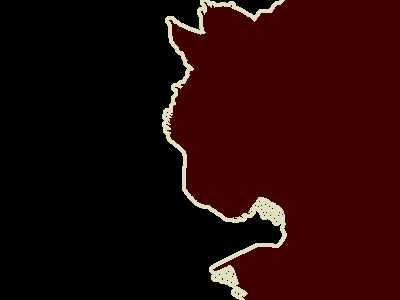

In [ ]:
a

ここまでが一枚のラベルを変更する手順（境界線を含めていない）

In [ ]:
a.save("/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass/2011_003216.png")

境界線を含めたラベルの変更手順

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from IPython.display import display_jpeg, display_png

pil_img = Image.open("/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass/2011_003216.png")  # PIL で読み込む。
img = np.asarray(pil_img)  # numpy 配列に変換する。
img_ = pil_img.convert("P")

print(img.shape)  # (500, 375)
print(img)
print(pil_img)
print(img_)
# [[  0   0   0 ...,   0   0   0]
#  [  0   0   0 ...,   0   0   0]
#  [  0   0   0 ...,   0   0   0]
#  ..., 
#  [255  11  11 ...,   0   0   0]
#  [255  11  11 ...,   0   0   0]
#  [255  11  11 ...,   0   0   0]]

(300, 400)
[[0 0 0 ... 8 8 8]
 [0 0 0 ... 8 8 8]
 [0 0 0 ... 8 8 8]
 ...
 [0 0 0 ... 8 8 8]
 [0 0 0 ... 8 8 8]
 [0 0 0 ... 8 8 8]]
<PIL.PngImagePlugin.PngImageFile image mode=P size=400x300 at 0x7F7734648190>
<PIL.Image.Image image mode=P size=400x300 at 0x7F772B3CAED0>


In [ ]:
color = pil_img.getpalette()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = np.asarray(pil_img)
img

array([[0, 0, 0, ..., 8, 8, 8],
       [0, 0, 0, ..., 8, 8, 8],
       [0, 0, 0, ..., 8, 8, 8],
       ...,
       [0, 0, 0, ..., 8, 8, 8],
       [0, 0, 0, ..., 8, 8, 8],
       [0, 0, 0, ..., 8, 8, 8]], dtype=uint8)

In [ ]:
img = np.where(img == 8,1,img)


In [ ]:
img

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
pil_img_color = Image.fromarray(img)

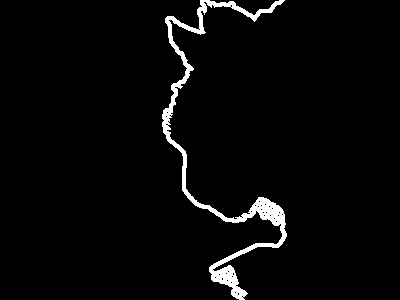

In [ ]:
pil_img_color

In [ ]:
pil_img_color = pil_img_color.convert('P')

In [ ]:
pil_img_color.putpalette(color)

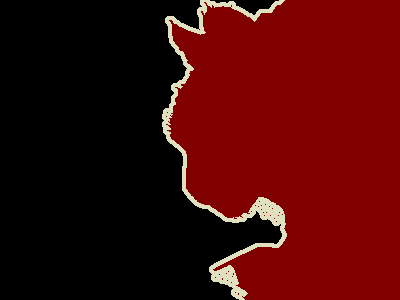

In [ ]:
pil_img_color

In [ ]:
pil_img_color.save("/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/cat_SegmentationClass_convert/2011_003216.png")

ここまで（境界線を含む）

In [ ]:
pil_img.getpalette()[0+8*3:3+8*3]

[64, 0, 0]

In [ ]:
pil_img.getpalette()

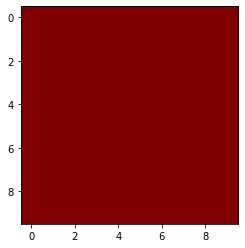

In [ ]:
a = np.ones((10,10))*128
a = np.uint8(a)
a = a[:,:,None]
a = np.concatenate([a,a,a], axis = 2)
a[:,:,1]=0
a[:,:,2]=0
plt.imshow(a)

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from IPython.display import display_jpeg, display_png

pil_img = Image.open("/content/drive/MyDrive/3_semantic_segmentation/data/VOCdevkit/VOC2012/SegmentationClass/2011_002929.png")  # PIL で読み込む。
img = np.asarray(pil_img)  # numpy 配列に変換する。
img_ = pil_img.convert("P")

# print(img.shape)  # (500, 375)
# print(img)
# print(pil_img)
# print(img_)
# [[  0   0   0 ...,   0   0   0]
#  [  0   0   0 ...,   0   0   0]
#  [  0   0   0 ...,   0   0   0]
#  ..., 
#  [255  11  11 ...,   0   0   0]
#  [255  11  11 ...,   0   0   0]
#  [255  11  11 ...,   0   0   0]]

(333, 500)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<PIL.PngImagePlugin.PngImageFile image mode=P size=500x333 at 0x7F819D579C90>
<PIL.Image.Image image mode=P size=500x333 at 0x7F819D579090>


In [ ]:
color = pil_img.getpalette()

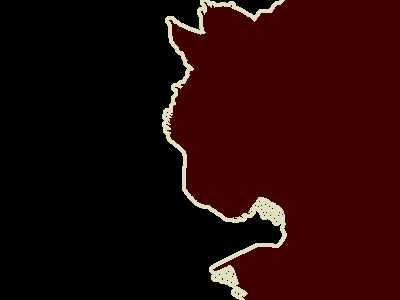

In [ ]:
pil_img

In [ ]:
# import numpy
# numpy.set_printoptions(numpy.inf)
# numpy.set_printoptions(threshold=numpy.inf)
# print(img)

In [ ]:
img_2 = np.asarray(img_)
img_2

array([[0, 0, 0, ..., 8, 8, 8],
       [0, 0, 0, ..., 8, 8, 8],
       [0, 0, 0, ..., 8, 8, 8],
       ...,
       [0, 0, 0, ..., 8, 8, 8],
       [0, 0, 0, ..., 8, 8, 8],
       [0, 0, 0, ..., 8, 8, 8]], dtype=uint8)

In [ ]:
img_3 = np.where(img_2 == 0,0,1)
# img_3.putpalette(color)
print(img_3.shape)
print(img_3)

(300, 400)
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [ ]:
pil_img_color =Image.fromarray(np.uint8(img_3))
print(pil_img_color)

<PIL.Image.Image image mode=L size=400x300 at 0x7F819D4AB890>


In [ ]:
type(a)

PIL.Image.Image

In [ ]:
a = pil_img_color.convert("P")

In [ ]:
a.putpalette(color)

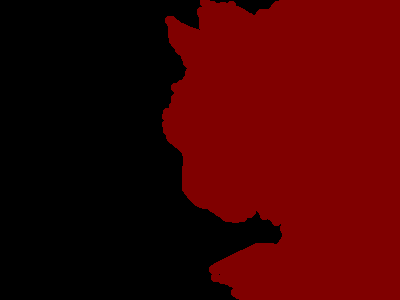

In [ ]:
a

In [ ]:
# img2 = np.where(img_ == 0,0,1)
# print(img2)

In [ ]:
# pil_img_color =Image.fromarray(np.uint8(img2))


In [ ]:
pallete_1 = a.getpalette()
pallete_1


In [ ]:
palette = pil_img.getpalette()
palette

(256, 3)


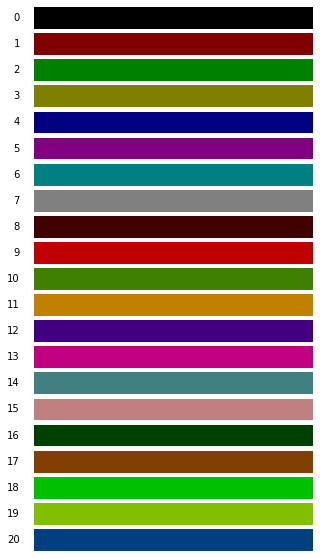

In [ ]:
# カラーパレットにアクセスする。
palette = pil_img.getpalette()
# リストの値は index=0 から順番に [R, G, B, R, G, B, ...]
palette = np.array(palette).reshape(-1, 3)
print(palette.shape)  # (256, 3)

# 256個のうち、0~20 だけ表示
fig, axes_list = plt.subplots(21, 1, figsize=(5, 10))
for i, color in enumerate(palette[:21]):
    color_img = np.full((1, 10, 3), color, dtype=np.uint8)

    axes_list[i].imshow(color_img, aspect='auto')
    axes_list[i].set_axis_off()
    axes_list[i].text(-1, 0, i, va='center', ha='right', fontsize=10)

plt.show()